# 角点检测算法Harris

### 使用opencv中的角点检测函数

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

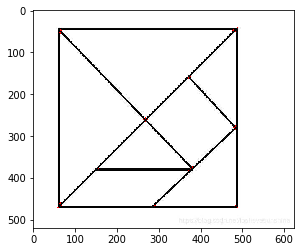

In [5]:
# 载入图像
img = cv2.imread('corner.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #转化成灰度图，形成单一通道
dst = cv2.cornerHarris(gray, blockSize=3, ksize=5, k=0.05)
image_dst = img[:, :, :]
image_dst[dst > 0.1 * dst.max()] = [255, 0, 0] #将检测到的角点标红
plt.imshow(image_dst)

### 手动实现角点检测函数
#### 程序修改自 https://www.cnblogs.com/wojianxin/p/12574909.html

In [6]:
import cv2 as cv 
import numpy as np
import matplotlib.pyplot as plt


# Harris corner detection
def Harris_corner(img):
    
	gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # 转换成灰度图像

	def Sobel_filtering(gray):
		H, W = gray.shape

		# 定义sobel核
		sobely = np.array(((1, 2, 1),
						(0, 0, 0),
						(-1, -2, -1)), dtype=np.float32)

		sobelx = np.array(((1, 0, -1),
						(2, 0, -2),
						(1, 0, -1)), dtype=np.float32)

		tmp = np.pad(gray, (1, 1), 'edge')

		Ix = np.zeros_like(gray, dtype=np.float32)
		Iy = np.zeros_like(gray, dtype=np.float32)

		for y in range(H):
			for x in range(W):
				Ix[y, x] = np.mean(tmp[y : y + 3, x : x + 3] * sobelx)
				Iy[y, x] = np.mean(tmp[y : y + 3, x : x + 3] * sobely)
			
		Ix2 = Ix ** 2
		Iy2 = Iy ** 2
		Ixy = Ix * Iy

		return Ix2, Iy2, Ixy


	# 高斯滤波
	def gaussian_filtering(I, K_size=3, sigma=3):
		H, W = I.shape

		I_t = np.pad(I, (K_size // 2, K_size // 2), 'edge')

		# 定义高斯核
		K = np.zeros((K_size, K_size), dtype=np.float)
		for x in range(K_size):
			for y in range(K_size):
				_x = x - K_size // 2
				_y = y - K_size // 2
				K[y, x] = np.exp( -(_x ** 2 + _y ** 2) / (2 * (sigma ** 2)))
		K /= (sigma * np.sqrt(2 * np.pi))
		K /= K.sum()

		# 进行滤波
		for y in range(H):
			for x in range(W):
				I[y,x] = np.sum(I_t[y : y + K_size, x : x + K_size] * K)
				
		return I

	# 定义角点检测函数
	def corner_detect(gray, Ix2, Iy2, Ixy, k=0.04, th=0.1):
		# 准备输出图像
		out = np.array((gray, gray, gray))
		out = np.transpose(out, (1,2,0))

		# 获取角点
		R = (Ix2 * Iy2 - Ixy ** 2) - k * ((Ix2 + Iy2) ** 2)

		# 将角点标红显示
		out[R >= np.max(R) * th] = [255, 0, 0]

		out = out.astype(np.uint8)

		return out

	# 获得Sobel算子滤波后的图像
	Ix2, Iy2, Ixy = Sobel_filtering(gray)

	# 进行高斯滤波
	Ix2 = gaussian_filtering(Ix2, K_size=3, sigma=3)
	Iy2 = gaussian_filtering(Iy2, K_size=3, sigma=3)
	Ixy = gaussian_filtering(Ixy, K_size=3, sigma=3)
    # 检测角点
	out = corner_detect(gray, Ix2, Iy2, Ixy)

	return out



# cv.imwrite("out.jpg", out)
# cv.imshow("result", out)
# cv.waitKey(0)
# cv.destroyAllWindows()

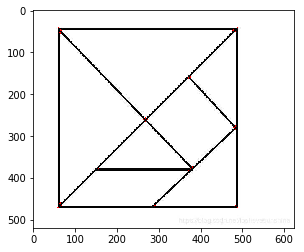

In [7]:
# Read image
img = cv2.imread("corner.jpg").astype(np.float32)

# 调用函数，检测角点
out = Harris_corner(img)
plt.imshow(out)